In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [3]:
def plot_probs(df, exp_order, ids=None, title=None, add_belief=False):
    
    if not ids:
        df_sub = df
    else:
        df_sub = df[df['firebase_id'].apply(lambda x: x in ids)]
        
    g = df_sub.groupby('uncertainty_expression') \
        .aggregate({'response':list}).reset_index()
    g['expression_order'] = g['uncertainty_expression'].apply(lambda x: exp_order[x])
    g = g.sort_values(by='expression_order', ascending=True)
    
    if add_belief:
        g2 = df_sub.groupby('uncertainty_expression') \
            .aggregate({'self_response':list}).reset_index()
        g2['expression_order'] = g2['uncertainty_expression'].apply(lambda x: exp_order[x])
        g2 = g2.sort_values(by='expression_order', ascending=True)
        x2 = list(g2['self_response'])
    
    x = list(g['response'])
    labels = sorted(exp_order, key=exp_order.get, reverse=False)
    
    plt.boxplot(x, labels=labels, vert=False)
    if add_belief:
        c2 = 'green'
        box1 = plt.boxplot(x2, labels=labels, vert=False, patch_artist=True)
        for item in ['boxes', 'whiskers', 'fliers', 'medians', 'caps']:
            plt.setp(box1[item], color=c2)
        plt.setp(box1["boxes"], facecolor=c2)
        plt.setp(box1["fliers"], markeredgecolor=c2)
    plt.xlim(-2,102)
    if title:
        plt.title(title)
    plt.show()

In [4]:
def double_prob_plot(df_main, exp_order, ids=None):
    
    if not ids:
        df_sub = df_main
    else:
        df_sub = df_main[df_main['firebase_id'].apply(lambda x: x in ids)]
    
        fig, ax = plt.subplots(1,2, figsize=(9,3))

    for t, i in zip(['true', 'false'], range(2)):
        df = df_sub[df_sub['true']==t]

        g = df.groupby('uncertainty_expression') \
            .aggregate({'response':list}).reset_index()
        g['expression_order'] = g['uncertainty_expression'].apply(lambda x: exp_order[x])
        g = g.sort_values(by='expression_order', ascending=True)

        g2 = df.groupby('uncertainty_expression') \
            .aggregate({'self_response':list}).reset_index()
        g2['expression_order'] = g2['uncertainty_expression'].apply(lambda x: exp_order[x])
        g2 = g2.sort_values(by='expression_order', ascending=True)
        x2 = list(g2['self_response'])

        x = list(g['response'])
        labels = sorted(exp_order, key=exp_order.get, reverse=False)

        ax[i].scatter(x, labels, marker='s', s=13, color='black')
        ax[i].scatter(x2, labels, marker = 'o', s=5, color='green')
        ax[i].set_xlim(-2,102)
        ax[i].set_title(t)

    ax[1].tick_params(labelleft=False)
    plt.show()


In [10]:
def get_corr(sub):
    corr, p = stats.spearmanr(sub['response'], sub['exp_order_int'])
    return corr

In [15]:
def filter_corr(to_add, t):
    to_add['exp_order_int'] = to_add['uncertainty_expression'].apply(lambda x: exp_order[x])
    c = pd.DataFrame(to_add.groupby('firebase_id').apply(get_corr))
    c.columns=['rho']
    to_add = pd.merge(right=to_add, left=c, on='firebase_id')
    to_add['include_participant'] = to_add['rho'].apply(lambda x: x > t)
    return to_add

In [20]:
df = pd.read_csv('humans_experiment1.csv')
df2 = pd.read_csv('humans_experiment2.csv')

In [21]:
exp_order = list(df.groupby(
        'uncertainty_expression'
    ).aggregate(
        {"response":"mean"}
    ).sort_values(by='response').index
)
exp_order = {x:i for x,i in zip(exp_order, range(len(exp_order)))}

In [23]:
t = 0.2
df = filter_corr(df, t)
df2 = filter_corr(df2, t)

In [27]:
exclude = len(df[df['include_participant']==False]['firebase_id'].unique())
print("excluding {} of {} participants in experiment 1".format(
    exclude, len(df['firebase_id'].unique())
))

exclude2 = len(df2[df2['include_participant']==False]['firebase_id'].unique())
print("excluding {} of {} participants in experiment 2".format(
    exclude2, len(df2['firebase_id'].unique())
))

excluding 5 of 99 participants in experiment 1
excluding 10 of 99 participants in experiment 2


In [30]:
df2['true'] = df2['statement_id'].apply(lambda x: x.split("_")[-2])

In [392]:
df.to_csv('humans_experiment1_proc.csv')
df2.to_csv('humans_experiment2_proc.csv')

### inspect filtered-out examples

Hwk66wQySefemnsJky77Y1RXshw1


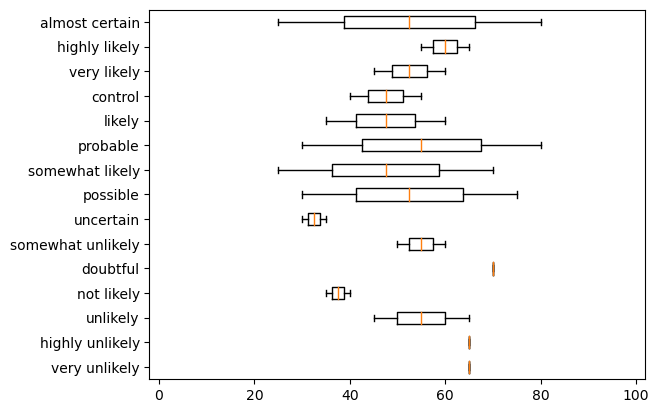

MPZev0YPhtQy24kHKblZqhhuMjm1


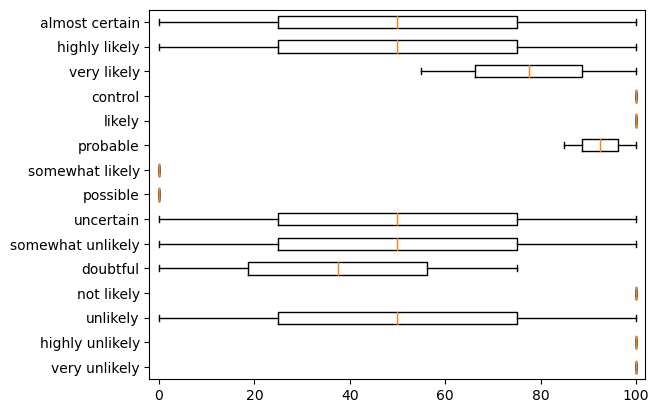

ddMXrQTXbVRoJ1NQmjKGKtmiEGv1


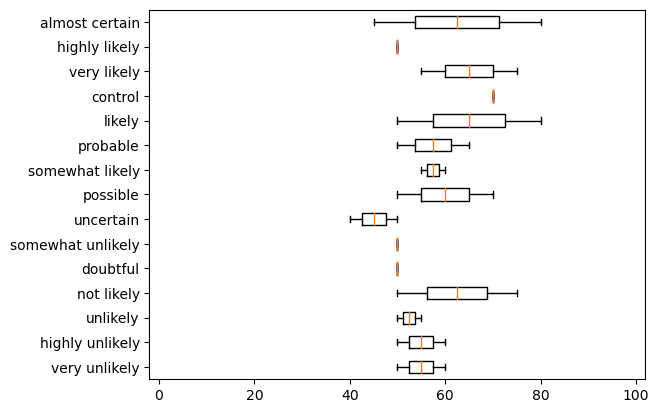

sbmeUXJSzwai6RkHXH7xWHuCQ0I3


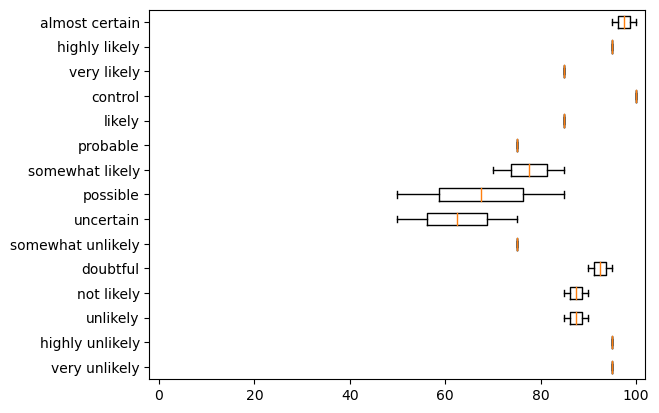

yLm3v6oRa0Ot16u5BwUqwfYujKy1


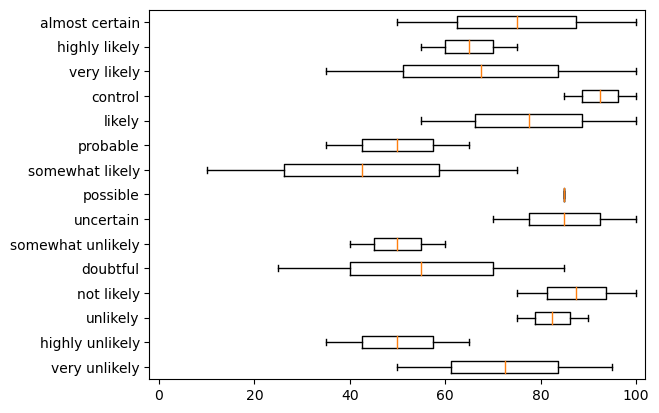

In [32]:
# experiment 1
for id_ in df['firebase_id'].unique():
    if np.any(df[df['firebase_id']==id_]['include_participant']==False):
        print(id_)
        plot_probs(df, exp_order, [id_])

7UqwmwgambfoDLsa3OkvdPirTE73


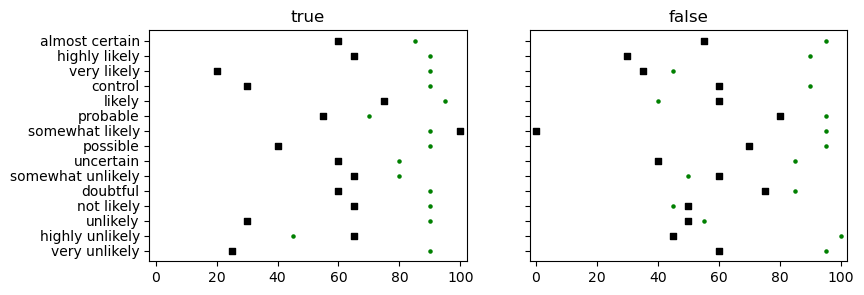

CoCfdHNpEIeoWkZq6HF814xpF302


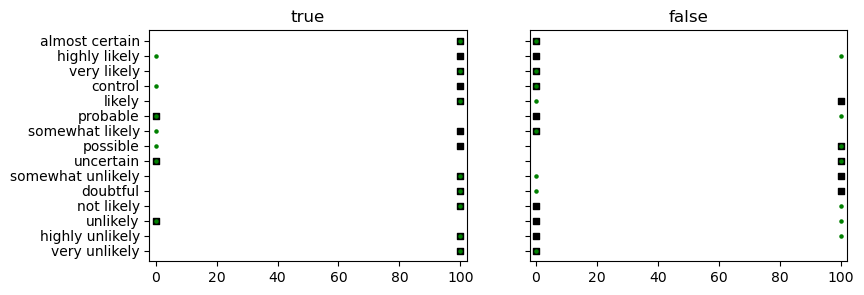

D6Fx4SklkTYDCype4Gjc4gj5YT82


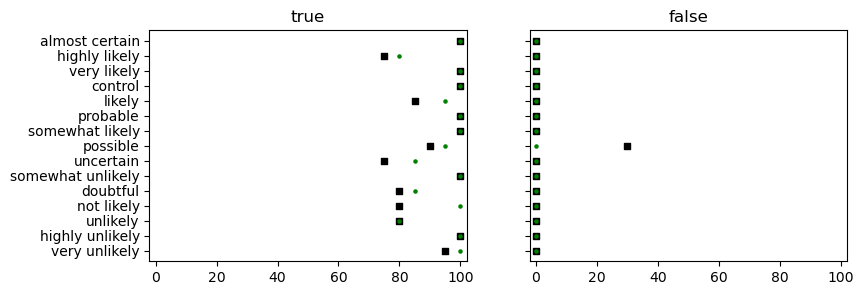

GoMHE8H03sUiz5IlD5iyRVpH81C2


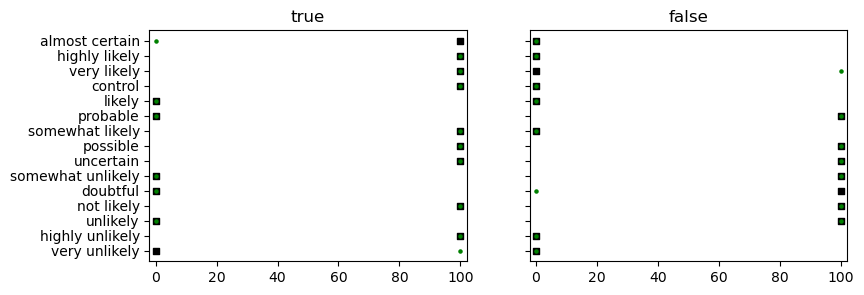

R2mLvKEnQlXKKNoOZCkdQcRPY8i1


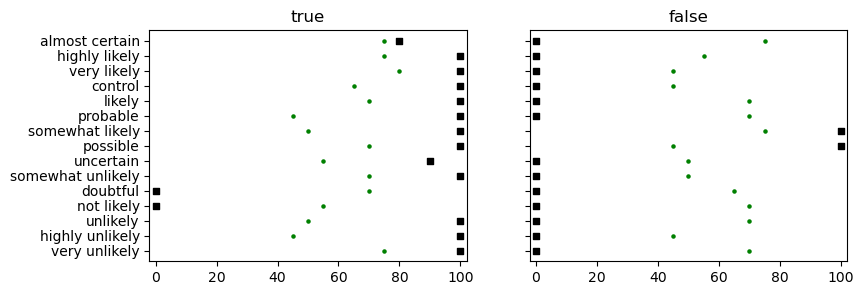

THfnqAyEW3PsIVQcxl5QBhEPdDn1


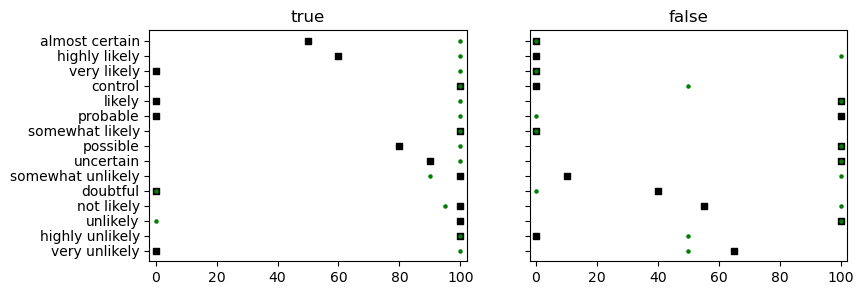

biMT5rz7BnezxYYtJJl0T0KGNcu1


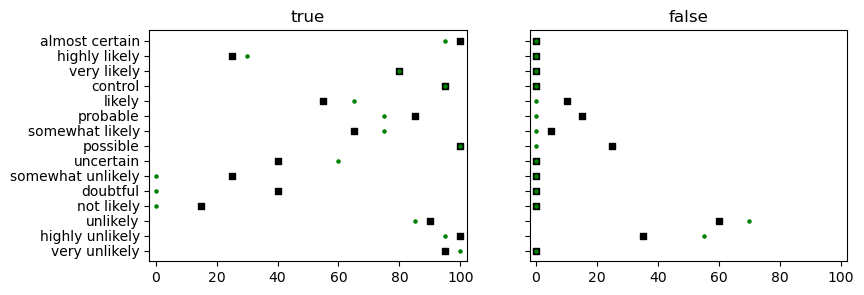

g8TJthMfabclBoqp69NbAcbhQEs1


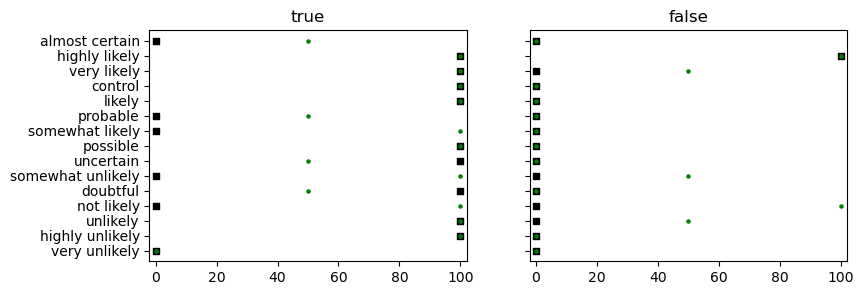

he3M2KhETpab04NHXFpYtOyLYfG2


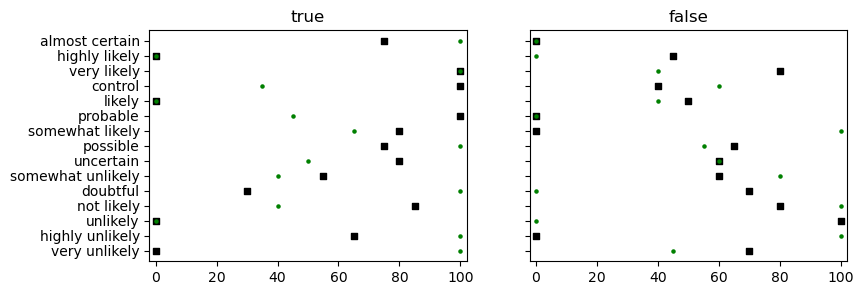

uls1aJAUQddezfplZBHePHcr1kl1


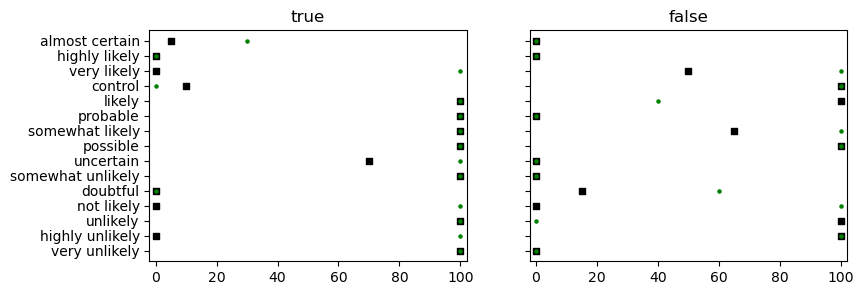

In [31]:
# experiment 2
for id_ in df2['firebase_id'].unique():
    if np.any(df2[df2['firebase_id']==id_]['include_participant']==False):
        print(id_)
        double_prob_plot(df2, exp_order, [id_])